In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [78]:
df = pd.read_excel('./DH임베딩파일(찐막).xlsx', index_col=0)

In [79]:
df

,predict_date,embedding,dh_embedding,대한타겟
0,2022-01-03,"[-0.6037547588348389, -0.2716784179210663, -0....","[-1.1741582155227661, -0.0009895184775814414, ...",0
1,2022-01-04,"[-0.5196923017501831, -0.10586358606815338, -0...","[-1.5450119972229004, 0.1073550432920456, 0.62...",0
2,2022-01-05,"[0.06001903489232063, -0.26933538913726807, -0...","[0.8755739331245422, -1.1648186445236206, 0.42...",0
3,2022-01-06,"[-0.6277961730957031, 0.20985981822013855, -0....","[-1.0764273405075073, 0.5690973997116089, -1.2...",0
4,2022-01-07,"[-1.1685419082641602, 0.013276146724820137, -0...","[-0.9454445242881775, 0.6343138217926025, -0.3...",1
...,...,...,...,...
478,2023-05-26,"[-0.45255357027053833, -0.4723578691482544, -0...","[-0.7881482243537903, -0.03484155982732773, -0...",0
479,2023-05-28,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.3275092840194702, 0.9411500096321106, -2.1...",1
480,2023-05-29,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.6175580024719238, -0.22508400678634644, -0...",1
481,2023-05-30,"[-1.3429021835327148, 0.09569352120161057, 0.1...","[-0.3128281235694885, -0.5751327872276306, -0....",1


In [80]:
oil_embedding = []
dh_embedding = []
for i in df['embedding']:
    oil_embedding.append(eval(i))
    # print(eval(i))
for i in df['dh_embedding']:
    dh_embedding.append(eval(i))
df['oil_embedding_1']= oil_embedding
df['dh_embedding_2']= dh_embedding

In [81]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result= pd.concat([df_result, pd.DataFrame(list(df['oil_embedding_1'])[i]).T], ignore_index = True)


In [82]:
df

,predict_date,embedding,dh_embedding,대한타겟,oil_embedding_1,dh_embedding_2
0,2022-01-03,"[-0.6037547588348389, -0.2716784179210663, -0....","[-1.1741582155227661, -0.0009895184775814414, ...",0,"[-0.6037547588348389, -0.2716784179210663, -0....","[-1.1741582155227661, -0.0009895184775814414, ..."
1,2022-01-04,"[-0.5196923017501831, -0.10586358606815338, -0...","[-1.5450119972229004, 0.1073550432920456, 0.62...",0,"[-0.5196923017501831, -0.10586358606815338, -0...","[-1.5450119972229004, 0.1073550432920456, 0.62..."
2,2022-01-05,"[0.06001903489232063, -0.26933538913726807, -0...","[0.8755739331245422, -1.1648186445236206, 0.42...",0,"[0.06001903489232063, -0.26933538913726807, -0...","[0.8755739331245422, -1.1648186445236206, 0.42..."
3,2022-01-06,"[-0.6277961730957031, 0.20985981822013855, -0....","[-1.0764273405075073, 0.5690973997116089, -1.2...",0,"[-0.6277961730957031, 0.20985981822013855, -0....","[-1.0764273405075073, 0.5690973997116089, -1.2..."
4,2022-01-07,"[-1.1685419082641602, 0.013276146724820137, -0...","[-0.9454445242881775, 0.6343138217926025, -0.3...",1,"[-1.1685419082641602, 0.013276146724820137, -0...","[-0.9454445242881775, 0.6343138217926025, -0.3..."
...,...,...,...,...,...,...
478,2023-05-26,"[-0.45255357027053833, -0.4723578691482544, -0...","[-0.7881482243537903, -0.03484155982732773, -0...",0,"[-0.45255357027053833, -0.4723578691482544, -0...","[-0.7881482243537903, -0.03484155982732773, -0..."
479,2023-05-28,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.3275092840194702, 0.9411500096321106, -2.1...",1,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.3275092840194702, 0.9411500096321106, -2.1..."
480,2023-05-29,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.6175580024719238, -0.22508400678634644, -0...",1,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.6175580024719238, -0.22508400678634644, -0..."
481,2023-05-30,"[-1.3429021835327148, 0.09569352120161057, 0.1...","[-0.3128281235694885, -0.5751327872276306, -0....",1,"[-1.3429021835327148, 0.09569352120161057, 0.1...","[-0.3128281235694885, -0.5751327872276306, -0...."


In [83]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['대한타겟'], test_size = 0.2, random_state = 1, stratify = df['대한타겟'])

In [85]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [86]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (386, 768)
변경된 차원 정보 : (386, 768, 1)


In [87]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(x_train_ex.shape[1], x_train_ex.shape[2])),
    layers.Dropout(0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [88]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [89]:
training_record = model.fit(x_train_ex, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_train_ex, y_train),
                    shuffle=True)

Epoch 1/30
4/4 [==============================] - 32s 6s/step - loss: 0.6914 - val_loss: 0.6837
Epoch 2/30
4/4 [==============================] - 24s 6s/step - loss: 0.6820 - val_loss: 0.6830
Epoch 3/30
4/4 [==============================] - 33s 8s/step - loss: 0.6843 - val_loss: 0.6823
Epoch 4/30
4/4 [==============================] - 24s 6s/step - loss: 0.6834 - val_loss: 0.6815
Epoch 5/30
4/4 [==============================] - 39s 11s/step - loss: 0.6805 - val_loss: 0.6828
Epoch 6/30
4/4 [==============================] - 24s 6s/step - loss: 0.6834 - val_loss: 0.6860
Epoch 7/30
4/4 [==============================] - 24s 6s/step - loss: 0.6862 - val_loss: 0.6871
Epoch 8/30
4/4 [==============================] - 28s 7s/step - loss: 0.6872 - val_loss: 0.6857
Epoch 9/30
4/4 [==============================] - 25s 7s/step - loss: 0.6859 - val_loss: 0.6842
Epoch 10/30
4/4 [==============================] - 27s 7s/step - loss: 0.6833 - val_loss: 0.6823
Epoch 11/30
4/4 [=====================

In [90]:
pred_proba = model.predict(x_test_ex)

4/4 [==============================] - 3s 331ms/step


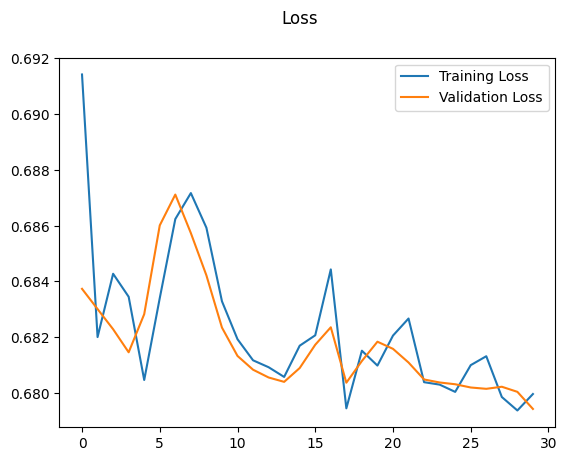

In [91]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [92]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.449
pred = (pred_proba_1d >= threshold)

In [93]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.5567010309278351
Precision = 0.0
Recall = 0.0
f1 score = 0.0


In [94]:
# 모델을 저장하는 코드
model.save('pretrained_model.h5')

In [95]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result= pd.concat([df_result, pd.DataFrame(list(df['dh_embedding_2'])[i]).T], ignore_index = True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['대한타겟'], test_size = 0.2, random_state = 1, stratify = df['대한타겟'])

In [97]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (386, 768)
변경된 차원 정보 : (386, 768, 1)


In [98]:
# 1. 기존에 학습한 모델 불러오기
from tensorflow.keras.models import load_model

pretrained_model = load_model('./pretrained_model.h5')


# 2. 모델의 일부 층 동결
for layer in pretrained_model.layers:
    layer.trainable = False

# 3. 새로운 출력층 추가
output_layer = layers.Dense(1, activation='sigmoid')(pretrained_model.layers[-2].output)

# 4. 전체 모델 구성
transfer_model = tf.keras.Model(inputs=pretrained_model.input, outputs=output_layer)

# 5. 모델 컴파일
transfer_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# 6. 전이 학습 진행
transfer_model.fit(x_train_ex, y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_train_ex, y_train),
                   shuffle=True)

Epoch 1/30
4/4 [==============================] - 22s 5s/step - loss: 0.6945 - val_loss: 0.6932
Epoch 2/30
4/4 [==============================] - 12s 3s/step - loss: 0.6927 - val_loss: 0.6921
Epoch 3/30
4/4 [==============================] - 12s 3s/step - loss: 0.6923 - val_loss: 0.6911
Epoch 4/30
4/4 [==============================] - 12s 3s/step - loss: 0.6908 - val_loss: 0.6901
Epoch 5/30
4/4 [==============================] - 12s 3s/step - loss: 0.6900 - val_loss: 0.6894
Epoch 6/30
4/4 [==============================] - 11s 3s/step - loss: 0.6898 - val_loss: 0.6887
Epoch 7/30
4/4 [==============================] - 11s 3s/step - loss: 0.6874 - val_loss: 0.6881
Epoch 8/30
4/4 [==============================] - 12s 3s/step - loss: 0.6886 - val_loss: 0.6876
Epoch 9/30
4/4 [==============================] - 12s 3s/step - loss: 0.6882 - val_loss: 0.6871
Epoch 10/30
4/4 [==============================] - 12s 3s/step - loss: 0.6873 - val_loss: 0.6866
Epoch 11/30
4/4 [======================

In [99]:
pred_proba = model.predict(x_test_ex)

4/4 [==============================] - 1s 334ms/step


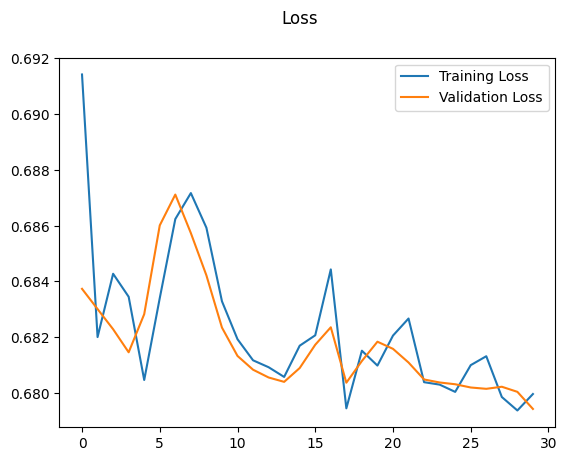

In [100]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [135]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.4
pred = (pred_proba_1d >= threshold)

In [136]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.5154639175257731
Precision = 0.457
Recall = 0.78
f1 score = 0.577


In [139]:
df = pd.read_excel('./LG임베딩파일(찐막).xlsx', index_col=0)

In [140]:
df

,predict_date,oil_embedding,lg_embedding,엘지타겟
1,2022-01-03,"[-0.6037547588348389, -0.2716784179210663, -0....","[-0.04477826505899429, -0.6552672982215881, -0...",0
2,2022-01-04,"[-0.5196923017501831, -0.10586358606815338, -0...","[-0.5478837490081787, -0.37626609206199646, -0...",1
3,2022-01-05,"[0.06001903489232063, -0.26933538913726807, -0...","[-1.141045331954956, 0.1912054866552353, -0.69...",1
4,2022-01-06,"[-0.6277961730957031, 0.20985981822013855, -0....","[-1.4709333181381226, 0.1910269409418106, -0.6...",1
5,2022-01-07,"[-1.1685419082641602, 0.013276146724820137, -0...","[-1.646777629852295, -0.45621272921562195, 0.0...",1
...,...,...,...,...
479,2023-05-26,"[-0.45255357027053833, -0.4723578691482544, -0...","[-1.621787667274475, 0.7511284351348877, -0.85...",0
480,2023-05-28,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.0272351503372192, 0.428819477558136, -0.97...",0
481,2023-05-29,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.0320804119110107, 0.1800602376461029, -0.4...",0
482,2023-05-30,"[-1.3429021835327148, 0.09569352120161057, 0.1...","[-1.6043791770935059, -0.728537380695343, -0.1...",0


In [141]:
oil_embedding = []
lg_embedding = []
for i in df['oil_embedding']:
    oil_embedding.append(eval(i))
    # print(eval(i))
for i in df['lg_embedding']:
    lg_embedding.append(eval(i))
df['oil_embedding_1']= oil_embedding
df['lg_embedding_2']= lg_embedding

In [142]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result= pd.concat([df_result, pd.DataFrame(list(df['oil_embedding_1'])[i]).T], ignore_index = True)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['엘지타겟'], test_size = 0.2, random_state = 1, stratify = df['엘지타겟'])

In [144]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [145]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (386, 768)
변경된 차원 정보 : (386, 768, 1)


In [146]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(x_train_ex.shape[1], x_train_ex.shape[2])),
    layers.Dropout(0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [147]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [148]:
training_record = model.fit(x_train_ex, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_train_ex, y_train),
                    shuffle=True)

Epoch 1/30
4/4 [==============================] - 34s 7s/step - loss: 0.6916 - val_loss: 0.6889
Epoch 2/30
4/4 [==============================] - 27s 7s/step - loss: 0.6883 - val_loss: 0.6884
Epoch 3/30
4/4 [==============================] - 42s 10s/step - loss: 0.6888 - val_loss: 0.6894
Epoch 4/30
4/4 [==============================] - 30s 8s/step - loss: 0.6885 - val_loss: 0.6944
Epoch 5/30
4/4 [==============================] - 27s 7s/step - loss: 0.6948 - val_loss: 0.6911
Epoch 6/30
4/4 [==============================] - 26s 7s/step - loss: 0.6905 - val_loss: 0.6885
Epoch 7/30
4/4 [==============================] - 30s 8s/step - loss: 0.6886 - val_loss: 0.6891
Epoch 8/30
4/4 [==============================] - 24s 6s/step - loss: 0.6892 - val_loss: 0.6895
Epoch 9/30
4/4 [==============================] - 24s 6s/step - loss: 0.6901 - val_loss: 0.6893
Epoch 10/30
4/4 [==============================] - 29s 7s/step - loss: 0.6895 - val_loss: 0.6888
Epoch 11/30
4/4 [=====================

In [149]:
pred_proba = model.predict(x_test_ex)

4/4 [==============================] - 3s 330ms/step


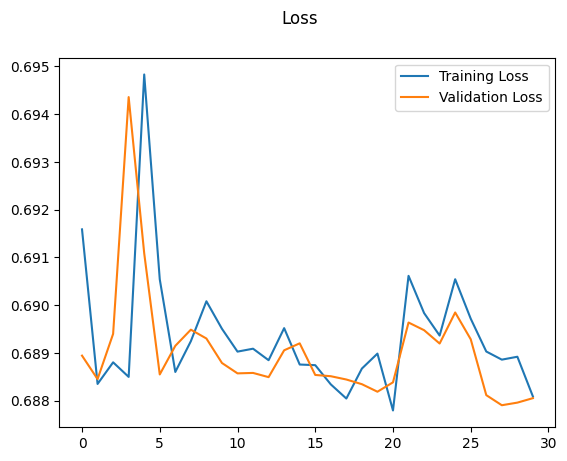

In [150]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [151]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.449
pred = (pred_proba_1d >= threshold)

In [152]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.4639175257731959
Precision = 0.456
Recall = 0.932
f1 score = 0.612


In [153]:
# 모델을 저장하는 코드
model.save('pretrained_model_2.h5')

In [154]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result= pd.concat([df_result, pd.DataFrame(list(df['lg_embedding_2'])[i]).T], ignore_index = True)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['엘지타겟'], test_size = 0.2, random_state = 1, stratify = df['엘지타겟'])

In [156]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (386, 768)
변경된 차원 정보 : (386, 768, 1)


In [157]:
# 1. 기존에 학습한 모델 불러오기
from tensorflow.keras.models import load_model

pretrained_model = load_model('./pretrained_model_2.h5')


# 2. 모델의 일부 층 동결
for layer in pretrained_model.layers:
    layer.trainable = False

# 3. 새로운 출력층 추가
output_layer = layers.Dense(1, activation='sigmoid')(pretrained_model.layers[-2].output)

# 4. 전체 모델 구성
transfer_model = tf.keras.Model(inputs=pretrained_model.input, outputs=output_layer)

# 5. 모델 컴파일
transfer_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# 6. 전이 학습 진행
transfer_model.fit(x_train_ex, y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_train_ex, y_train),
                   shuffle=True)

Epoch 1/30
4/4 [==============================] - 19s 4s/step - loss: 0.6919 - val_loss: 0.6917
Epoch 2/30
4/4 [==============================] - 12s 3s/step - loss: 0.6922 - val_loss: 0.6918
Epoch 3/30
4/4 [==============================] - 12s 3s/step - loss: 0.6915 - val_loss: 0.6919
Epoch 4/30
4/4 [==============================] - 11s 3s/step - loss: 0.6919 - val_loss: 0.6920
Epoch 5/30
4/4 [==============================] - 11s 3s/step - loss: 0.6918 - val_loss: 0.6920
Epoch 6/30
4/4 [==============================] - 12s 3s/step - loss: 0.6926 - val_loss: 0.6921
Epoch 7/30
4/4 [==============================] - 12s 3s/step - loss: 0.6924 - val_loss: 0.6922
Epoch 8/30
4/4 [==============================] - 17s 5s/step - loss: 0.6923 - val_loss: 0.6921
Epoch 9/30
4/4 [==============================] - 16s 5s/step - loss: 0.6915 - val_loss: 0.6919
Epoch 10/30
4/4 [==============================] - 12s 3s/step - loss: 0.6925 - val_loss: 0.6917
Epoch 11/30
4/4 [======================

In [158]:
pred_proba = model.predict(x_test_ex)

4/4 [==============================] - 1s 339ms/step


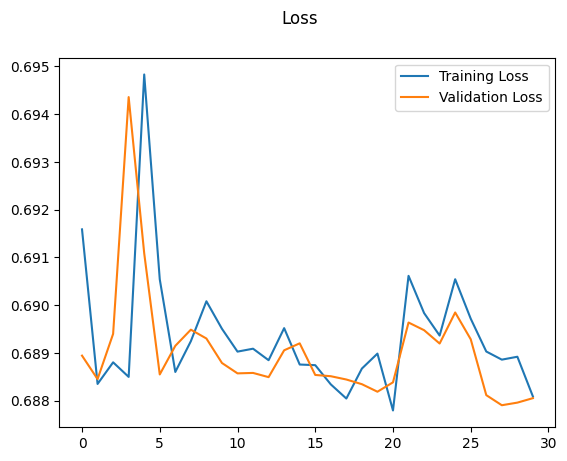

In [159]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [172]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.47
pred = (pred_proba_1d >= threshold)

In [173]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.5979381443298969
Precision = 0.619
Recall = 0.295
f1 score = 0.4
